In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wgender_df = pd.read_csv('gender.csv')
wgender_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,gender,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students
0,200910,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Female,37.8,9.1,110611,26637,292506
1,200910,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Male,30.0,7.7,91081,23429,303251
2,200910,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Total,33.9,8.4,201692,50066,595757
3,201011,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Female,39.0,9.3,115674,27569,296336
4,201011,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,Male,31.4,7.8,96129,24042,306284


In [2]:
wgender_df.shape

(6333, 16)

In [3]:
wgender_df = wgender_df[wgender_df['gender'].isin(['Male', 'Female'])]

wgender_df.shape

(4222, 16)

In [4]:
wgender_df.isna().sum()

time_period                            0
time_identifier                        0
geographic_level                       0
country_code                           0
country_name                           0
region_code                           26
region_name                           26
old_la_code                          312
new_la_code                          328
la_name                              312
gender                                 0
progression_rate                       0
high_tariff_progression_rate           0
number_of_he_students                  0
number_of_high_tariff_he_students      0
number_of_students                     0
dtype: int64

In [5]:
wgender_df.dropna(inplace = True)

In [6]:
wgender_df['year'] = (wgender_df['time_period'] % 100) + 2000


# Identifying the outliers

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/601647521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wgender_df, x='year', y='progression_rate', palette='Greens')


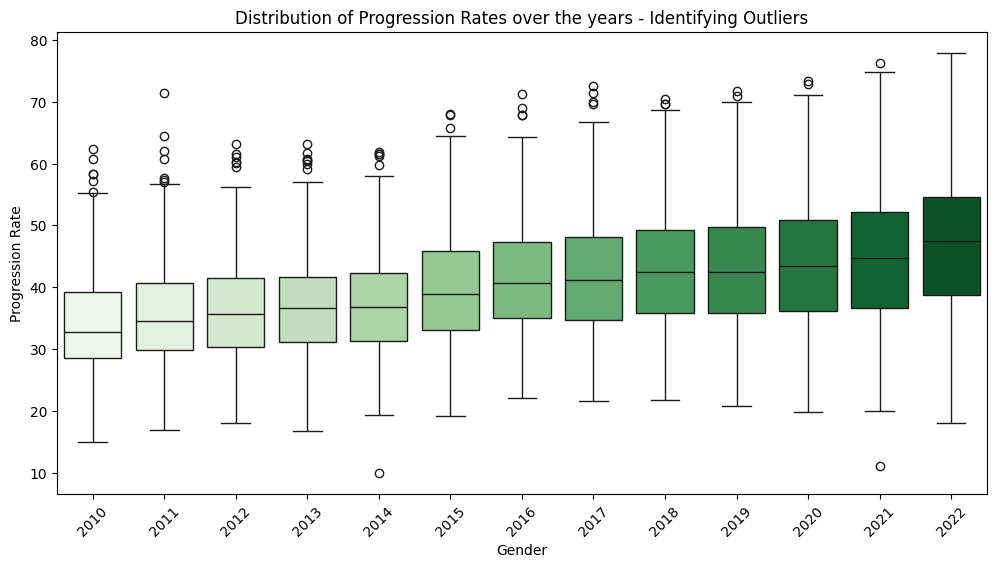

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=wgender_df, x='year', y='progression_rate', palette='Greens')
plt.xticks(rotation=45)
plt.title('Distribution of Progression Rates over the years - Identifying Outliers')
plt.xlabel('Gender')
plt.ylabel('Progression Rate')
plt.show()


In [8]:
genfilter_dt = wgender_df

In [9]:
def rmve_outliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('year'):
        firstQ1 = grpdt['progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['progression_rate'] >= lwrbnd) & (grpdt['progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata


In [10]:
genfilter_outli_1 = rmve_outliers_mth(genfilter_dt)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/2657024458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outli_1, x='year', y='progression_rate', palette='Blues')


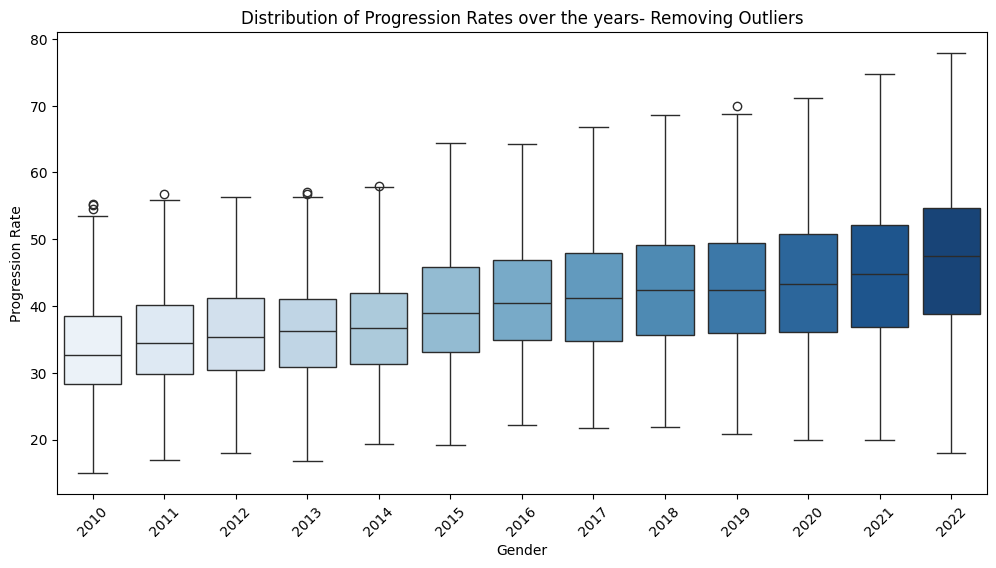

In [11]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=genfilter_outli_1, x='year', y='progression_rate', palette='Blues')
plt.xticks(rotation=45)
plt.title('Distribution of Progression Rates over the years- Removing Outliers')
plt.xlabel('Gender')
plt.ylabel('Progression Rate')
plt.show()


In [12]:
genfilter_outli_2 = rmve_outliers_mth(genfilter_outli_1)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/3806281981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outli_2, x='year', y='progression_rate', palette='Purples')


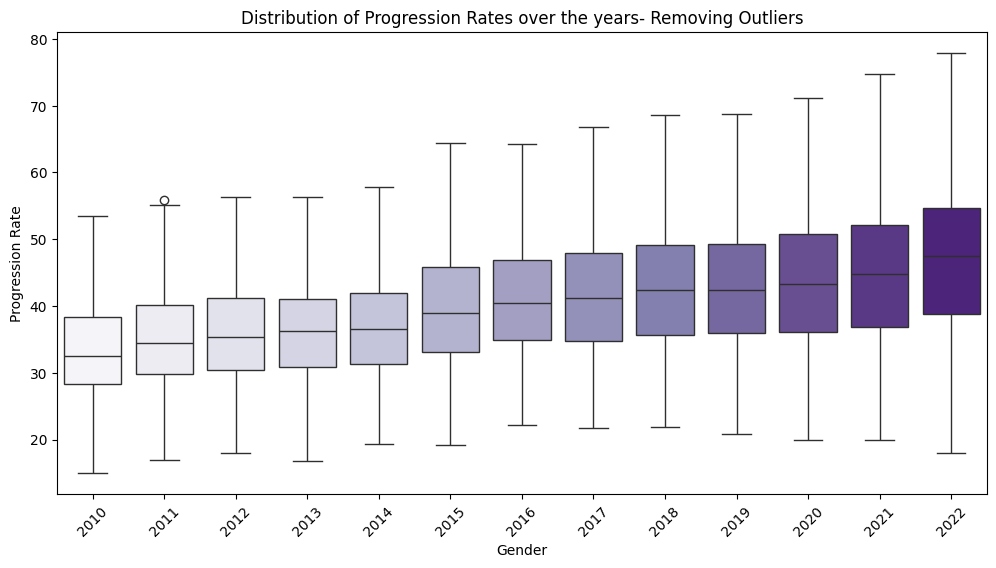

In [13]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=genfilter_outli_2, x='year', y='progression_rate', palette='Purples')
plt.xticks(rotation=45)
plt.title('Distribution of Progression Rates over the years- Removing Outliers')
plt.xlabel('Gender')
plt.ylabel('Progression Rate')
plt.show()


In [14]:
genfilter_outli_3 = rmve_outliers_mth(genfilter_outli_2)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/1915922813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outli_3, x='year', y='progression_rate', palette='viridis')


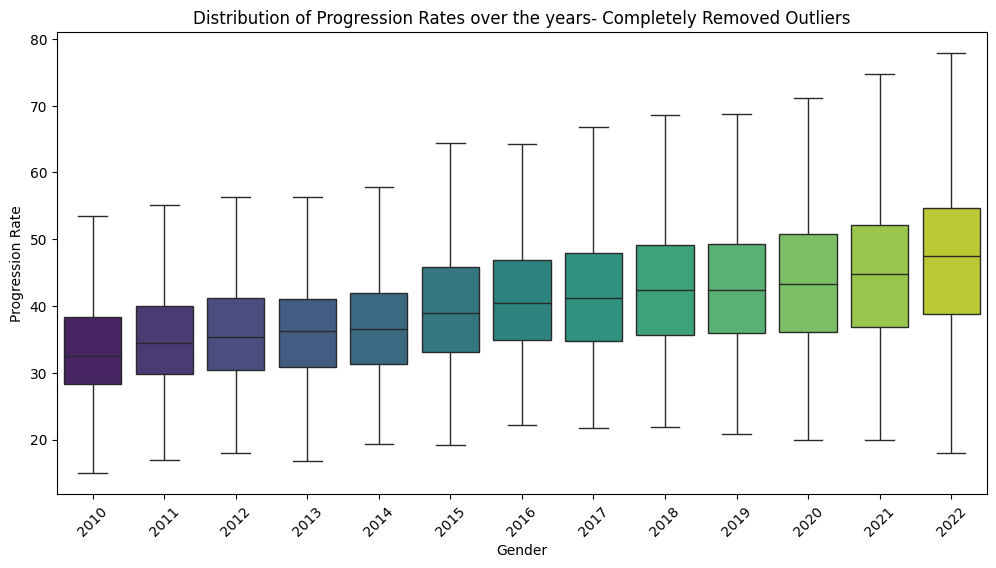

In [15]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=genfilter_outli_3, x='year', y='progression_rate', palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Progression Rates over the years- Completely Removed Outliers')
plt.xlabel('Gender')
plt.ylabel('Progression Rate')
plt.show()


# Progression Rate Over the Years by Gender

# Reference - https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

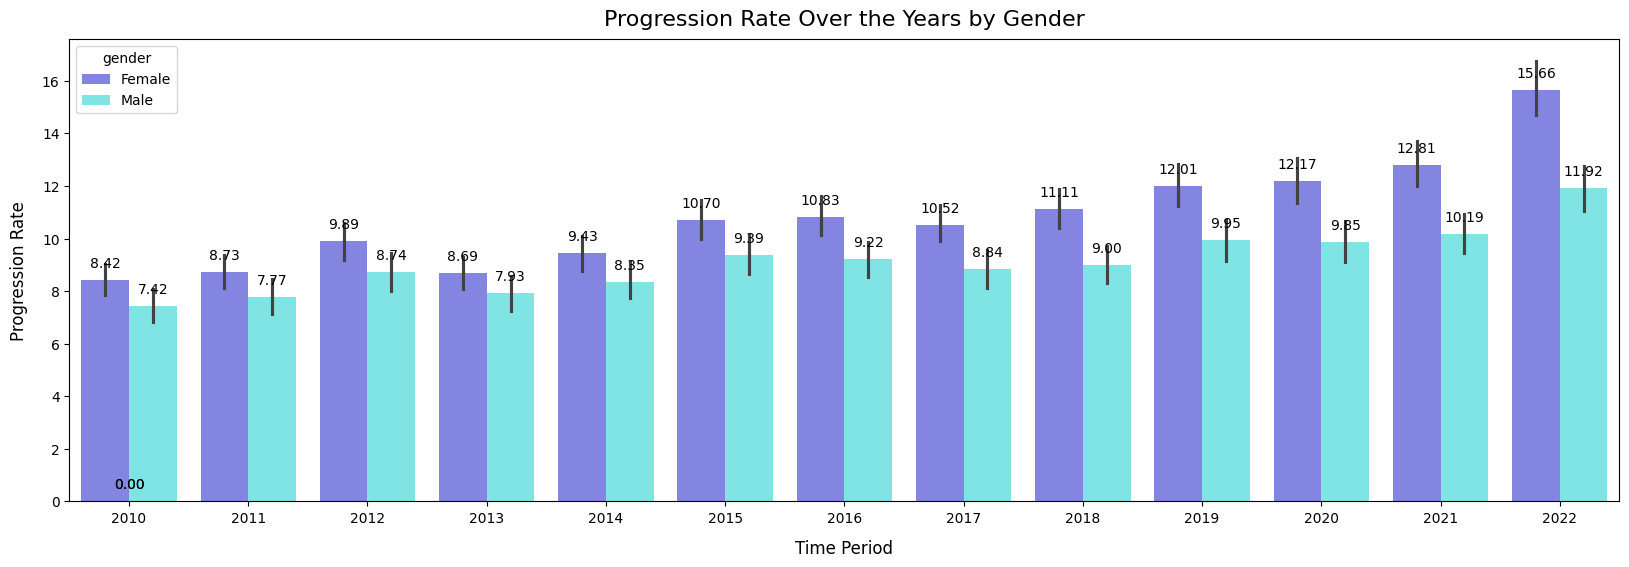

In [16]:

plt.figure(figsize=(20, 6))
snsbr = sns.barplot(data=genfilter_outli_3, x='year', y='high_tariff_progression_rate', hue='gender',
                 palette=['#7575f0', '#71f4f4'])

plt.xlabel('Time Period', labelpad= 10, fontsize=12)
plt.ylabel('Progression Rate', labelpad= 10, fontsize=12)
plt.title('Progression Rate Over the Years by Gender', pad= 10, fontsize=16)

for pechbr in snsbr.patches:
    hgt_br = pechbr.get_height()
    snsbr.annotate(f'{hgt_br:.2f}', 
                (pechbr.get_x() + pechbr.get_width() / 2., hgt_br), 
                ha='center', xytext=(0, 9),textcoords='offset points')

plt.show()


/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/501591892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outli_3, x='year', y='high_tariff_progression_rate', palette='Greens')


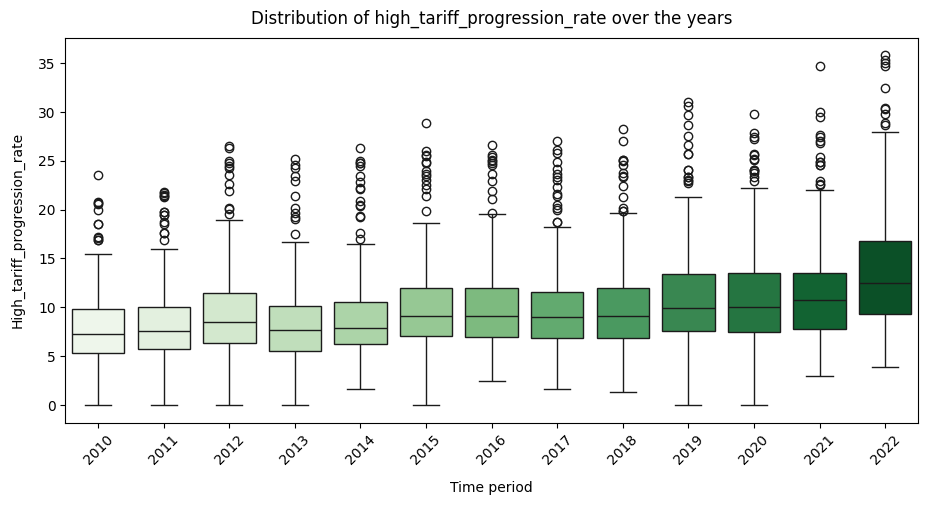

In [17]:

plt.figure(figsize=(11, 5))
sns.boxplot(data=genfilter_outli_3, x='year', y='high_tariff_progression_rate', palette='Greens')
plt.xticks(rotation=45)
plt.title('Distribution of high_tariff_progression_rate over the years', pad= 10)
plt.xlabel('Time period', labelpad = 10)
plt.ylabel('High_tariff_progression_rate', labelpad = 10)
plt.show()


In [18]:
def high_tariffoutliers_mth(passdf):
    filtdata = pd.DataFrame()
    for categdt, grpdt in passdf.groupby('year'):
        firstQ1 = grpdt['high_tariff_progression_rate'].quantile(0.25)
        thirdQ3 = grpdt['high_tariff_progression_rate'].quantile(0.75)
        dtIQR = thirdQ3 - firstQ1
        lwrbnd = firstQ1 - 1.5 * dtIQR
        upbnd = thirdQ3 + 1.5 * dtIQR
        filtgrp = grpdt[(grpdt['high_tariff_progression_rate'] >= lwrbnd) & (grpdt['high_tariff_progression_rate'] <= upbnd)]
        filtdata = pd.concat([filtdata, filtgrp])
    return filtdata

In [19]:
genfilter_outA = high_tariffoutliers_mth(genfilter_outli_3)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/1837323431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outA, x='year', y='high_tariff_progression_rate', palette='Greens')


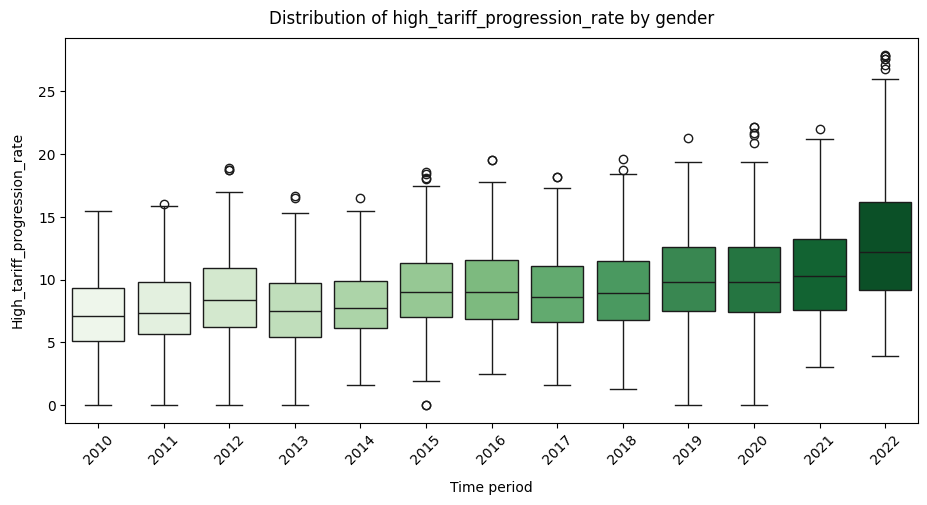

In [20]:

plt.figure(figsize=(11, 5))
sns.boxplot(data=genfilter_outA, x='year', y='high_tariff_progression_rate', palette='Greens')
plt.xticks(rotation=45)
plt.title('Distribution of high_tariff_progression_rate by gender', pad= 10)
plt.xlabel('Time period', labelpad = 10)
plt.ylabel('High_tariff_progression_rate', labelpad = 10)
plt.show()


In [21]:
genfilter_outB = high_tariffoutliers_mth(genfilter_outA)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/798824177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outB, x='year', y='high_tariff_progression_rate', palette='Greens')


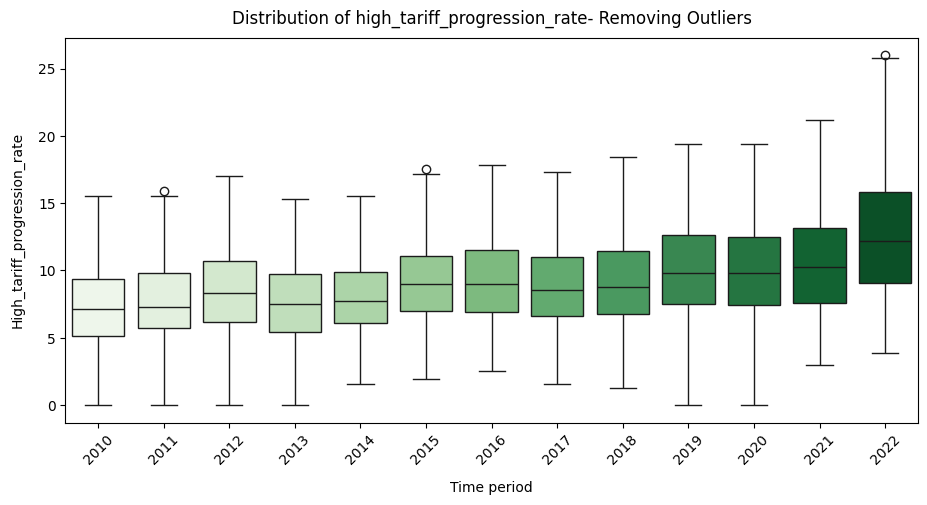

In [22]:

plt.figure(figsize=(11, 5))
sns.boxplot(data=genfilter_outB, x='year', y='high_tariff_progression_rate', palette='Greens')
plt.xticks(rotation=45)
plt.title('Distribution of high_tariff_progression_rate- Removing Outliers', pad= 10)
plt.xlabel('Time period', labelpad = 10)
plt.ylabel('High_tariff_progression_rate', labelpad = 10)
plt.show()


In [23]:
genfilter_outC = high_tariffoutliers_mth(genfilter_outB)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/2987371485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outC, x='year', y='high_tariff_progression_rate', palette='Greens')


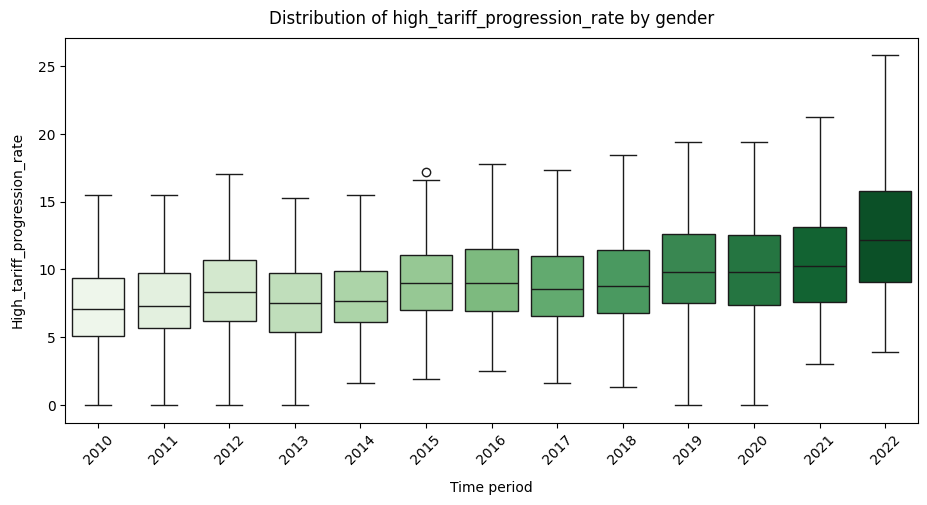

In [24]:

plt.figure(figsize=(11, 5))
sns.boxplot(data=genfilter_outC, x='year', y='high_tariff_progression_rate', palette='Greens')
plt.xticks(rotation=45)
plt.title('Distribution of high_tariff_progression_rate by gender', pad= 10)
plt.xlabel('Time period', labelpad = 10)
plt.ylabel('High_tariff_progression_rate', labelpad = 10)
plt.show()


In [25]:
genfilter_outD = high_tariffoutliers_mth(genfilter_outC)

/var/folders/bw/gz4rllf1447_w_jzf73m9nz00000gn/T/ipykernel_54730/1621072035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genfilter_outD, x='year', y='high_tariff_progression_rate', palette='Reds')


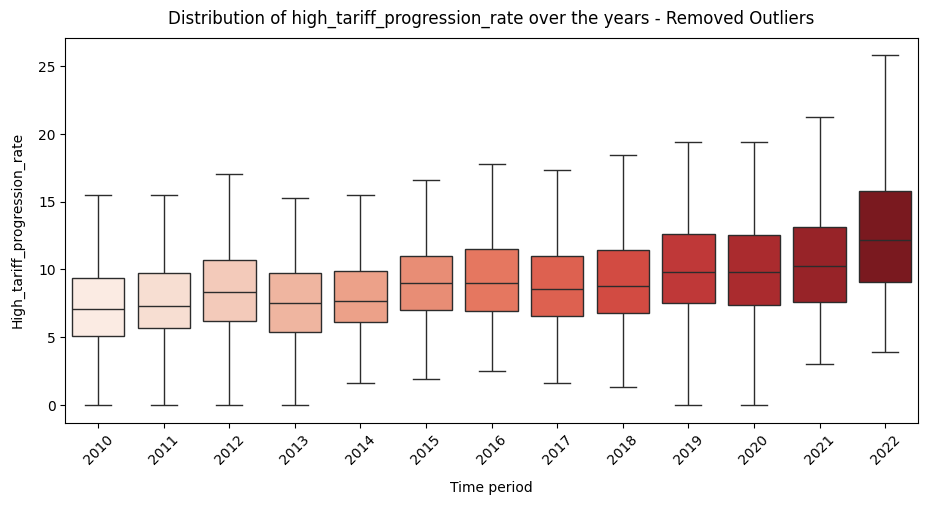

In [26]:

plt.figure(figsize=(11, 5))
sns.boxplot(data=genfilter_outD, x='year', y='high_tariff_progression_rate', palette='Reds')
plt.xticks(rotation=45)
plt.title('Distribution of high_tariff_progression_rate over the years - Removed Outliers', pad= 10)
plt.xlabel('Time period', labelpad = 10)
plt.ylabel('High_tariff_progression_rate', labelpad = 10)
plt.show()


# See Tableau Visualisations

# Label Encoder

In [27]:
from sklearn.preprocessing import LabelEncoder

for clname in genfilter_outD.columns:
    if genfilter_outD[clname].dtype == 'object':
        lblenc_details = LabelEncoder()
        genfilter_outD[clname] = lblenc_details.fit_transform(genfilter_outD[clname])




In [28]:
genfilter_outD.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,gender,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students,year
468,200910,0,0,0,0,0,3,390.0,91,41,0,35.9,6.7,400,75,1115,2010
469,200910,0,0,0,0,0,3,390.0,91,41,1,28.8,6.2,336,72,1166,2010
507,200910,0,0,0,0,0,3,391.0,75,78,0,30.6,6.4,428,90,1397,2010
508,200910,0,0,0,0,0,3,391.0,75,78,1,24.0,6.2,358,93,1494,2010
546,200910,0,0,0,0,0,3,392.0,76,84,0,36.7,7.8,409,87,1115,2010


In [29]:

cond_det = [(genfilter_outD['progression_rate'] < 25),
    (genfilter_outD['progression_rate'] >= 25) & (genfilter_outD['progression_rate'] <= 50),
    (genfilter_outD['progression_rate'] > 50) & (genfilter_outD['progression_rate'] <= 75),
    (genfilter_outD['progression_rate'] > 75) & (genfilter_outD['progression_rate'] <= 100)
]
newlbl = [0,1,2,3]
genfilter_outD['progression_rate'] = pd.cut(genfilter_outD['progression_rate'], bins=[-float("inf"), 25, 50, 75, 100], labels=newlbl)

genfilter_outD['progression_rate'] = genfilter_outD['progression_rate'].astype(int)

In [30]:
genfilter_outD.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,gender,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students,year
468,200910,0,0,0,0,0,3,390.0,91,41,0,1,6.7,400,75,1115,2010
469,200910,0,0,0,0,0,3,390.0,91,41,1,1,6.2,336,72,1166,2010
507,200910,0,0,0,0,0,3,391.0,75,78,0,1,6.4,428,90,1397,2010
508,200910,0,0,0,0,0,3,391.0,75,78,1,0,6.2,358,93,1494,2010
546,200910,0,0,0,0,0,3,392.0,76,84,0,1,7.8,409,87,1115,2010


In [31]:
unique_prgval = genfilter_outD.nunique()
print("Number of unique values\n", unique_prgval)


Number of unique values
 time_period                            13
time_identifier                         1
geographic_level                        1
country_code                            1
country_name                            1
region_code                            10
region_name                            10
old_la_code                           148
new_la_code                           148
la_name                               148
gender                                  2
progression_rate                        4
high_tariff_progression_rate          212
number_of_he_students                1397
number_of_high_tariff_he_students     618
number_of_students                   2126
year                                   13
dtype: int64


In [32]:
columns_to_drop = ['time_identifier', 'country_code','country_name','geographic_level','time_period']
finalgen_df = genfilter_outD.drop(columns=columns_to_drop)

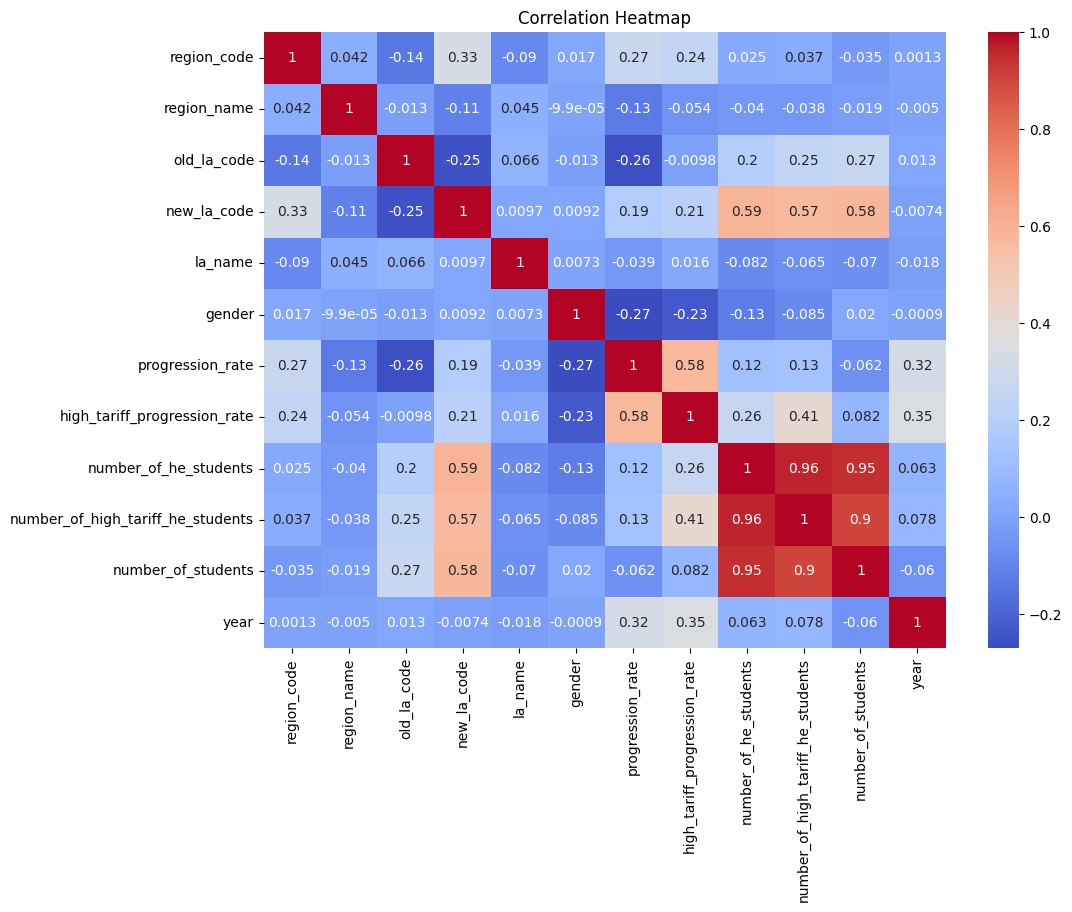

In [33]:
correlationM_det = finalgen_df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(correlationM_det, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
#finalgen_df.drop('high_tariff_progression_rate', axis=1, inplace=True)
finalgen_df.drop('number_of_high_tariff_he_students', axis=1, inplace=True)
finalgen_df.drop('number_of_he_students', axis=1, inplace=True)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [36]:

xdata = finalgen_df.drop(['progression_rate'], axis=1)  
ydata = finalgen_df['progression_rate']

# Standard Scalar

In [37]:
x_scdata = StandardScaler().fit_transform(xdata)

In [38]:
x_scdata

array([[-1.50812955, -0.70507389, -0.868564  , ..., -0.68054659,
        -0.5465508 , -1.62164502],
       [-1.50812955, -0.70507389, -0.868564  , ..., -0.81432603,
        -0.51238317, -1.62164502],
       [-1.50812955, -0.70507389, -0.86491718, ..., -0.76081425,
        -0.35762389, -1.62164502],
       ...,
       [ 0.89219164,  0.78858169,  1.04966469, ...,  0.92480672,
         0.77124791,  1.59016538],
       [ 0.89219164,  0.78858169,  1.11166067, ...,  0.41644484,
         0.19307796,  1.59016538],
       [ 0.89219164,  0.78858169,  1.11166067, ..., -0.76081425,
         0.31299965,  1.59016538]])

In [39]:
x_traindts,x_testdts,y_traindts,y_testdts = train_test_split(x_scdata,ydata,test_size = 0.2, random_state=0)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [41]:
from time import time
parlogi_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,200],
    'penalty': ['l1', 'l2']
}
logreg_gdcv = GridSearchCV(LogisticRegression(), param_grid=parlogi_reg,cv=7, n_jobs=-1)
logreg_gdcv.fit(x_traindts,y_traindts)
logi_bstparm = logreg_gdcv.best_params_
logi_bstscore = logreg_gdcv.best_score_
print("Best_parameters : ", logi_bstparm)
print("Best_score :",logi_bstscore)





/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Best_parameters :  {'C': 1, 'penalty': 'l2'}
Best_score : 0.896789469902429


/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Complete time to build and evaluate :  0.11688399314880371
 Logistic_Regression accuracy details : 0.9075862068965517
 Logistic_Regression mean squared error details: 0.3039963702142647


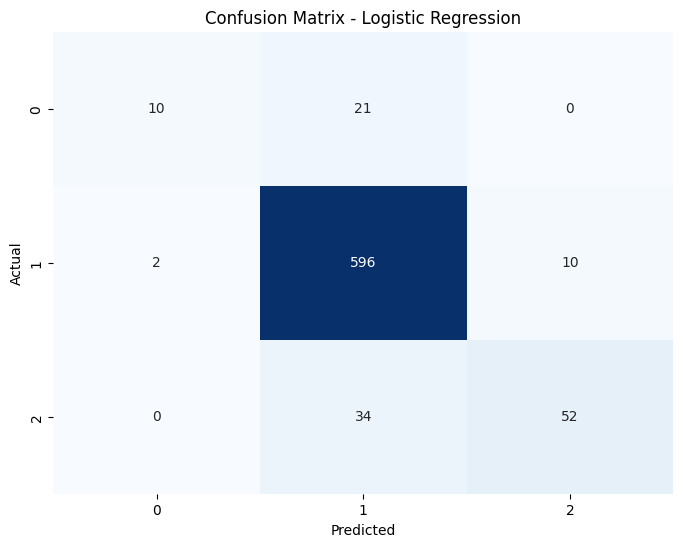


classification report: Logistic Regression 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              precision    recall  f1-score   support

           0       0.83      0.32      0.47        31
           1       0.92      0.98      0.95       608
           2       0.84      0.60      0.70        86

    accuracy                           0.91       725
   macro avg       0.86      0.64      0.70       725
weighted avg       0.90      0.91      0.90       725



In [42]:
from time import time
import numpy as np

logistart_tm = time()

logireg_mdl = LogisticRegression(penalty= 'l2', C = 200,max_iter=900)
logireg_mdl.fit(x_traindts,y_traindts)
logi_ypred = logireg_mdl.predict(x_testdts)

logireg_score = logireg_mdl.score(x_testdts,y_testdts)

logiend_tm = time()

logireg_mse = np.sqrt(mean_squared_error(y_testdts,logi_ypred))

logireg_clsrpt = classification_report(y_testdts,logi_ypred)

#confusion matrix
logireg_cfnmtx = confusion_matrix(y_testdts,logi_ypred)

print("Complete time to build and evaluate : ", logiend_tm-logistart_tm)
print(" Logistic_Regression accuracy details :",logireg_score)
print(" Logistic_Regression mean squared error details:",logireg_mse)

plt.figure(figsize=(8, 6))
sns.heatmap(logireg_cfnmtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nclassification report: Logistic Regression \n")

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(logireg_clsrpt)

# Decision Tree Classifier

In [43]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
decparm = {
    'criterion': ['gini', "entropy"],
    'max_depth': [a for a in range(1, 65, 5)], 
    'min_samples_leaf': [b for b in range(1, 21, 1)]}
dectr_gd = GridSearchCV(DecisionTreeClassifier(), param_grid=decparm, cv=5) 
dectr_gd.fit(x_traindts, y_traindts)


print(" Best parameters : ",dectr_gd.best_params_)
print("Best score : ",dectr_gd.best_score_)

/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


 Best parameters :  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1}
Best score :  0.9012840212018343


Decision Tree Algorithm:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 time 0.007612943649291992

Score : 0.9158620689655173
 Confusion matrix :


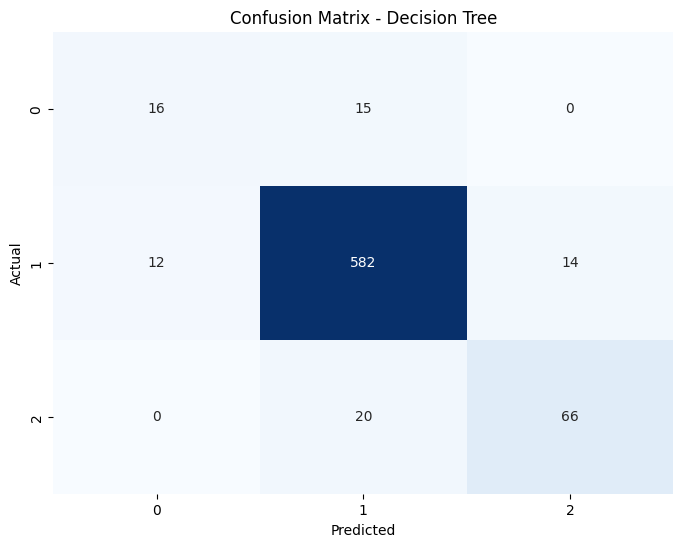


Classification Report : Decision Tree
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        31
           1       0.94      0.96      0.95       608
           2       0.82      0.77      0.80        86

    accuracy                           0.92       725
   macro avg       0.78      0.75      0.76       725
weighted avg       0.91      0.92      0.91       725



In [45]:
logistart_tm = time()
dectr_modl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50,min_samples_leaf = 1)
dectr_modl.fit(x_traindts,y_traindts)
logiend_tm = time()
dectr_ypred = dectr_modl.predict(x_testdts)
dectr_scr = dectr_modl.score(x_testdts,y_testdts)
dectr_confm = confusion_matrix(y_testdts,dectr_ypred)
dectr_clssrpt = classification_report(y_testdts,dectr_ypred)
print("Decision Tree Algorithm:")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(" time",logiend_tm-logistart_tm)
print("\nScore :",dectr_scr)
print(" Confusion matrix :")
plt.figure(figsize=(8, 6))
sns.heatmap(dectr_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report : Decision Tree")
print(dectr_clssrpt)


# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
randfst_parm = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": range(200, 900, 200)}
randfst_gdcv = GridSearchCV(RandomForestClassifier(), param_grid=randfst_parm, cv=5)
randfst_gdcv.fit(x_traindts, y_traindts)
print('Best Random Forest attributes:', randfst_gdcv.best_params_)
print('Best random forest Score:', randfst_gdcv.best_score_)

/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest attributes: {'criterion': 'entropy', 'n_estimators': 600}
Best random forest Score: 0.9285504139122148


Random forest Evaluation
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
time :  2.1890668869018555
 score:  0.9572413793103448


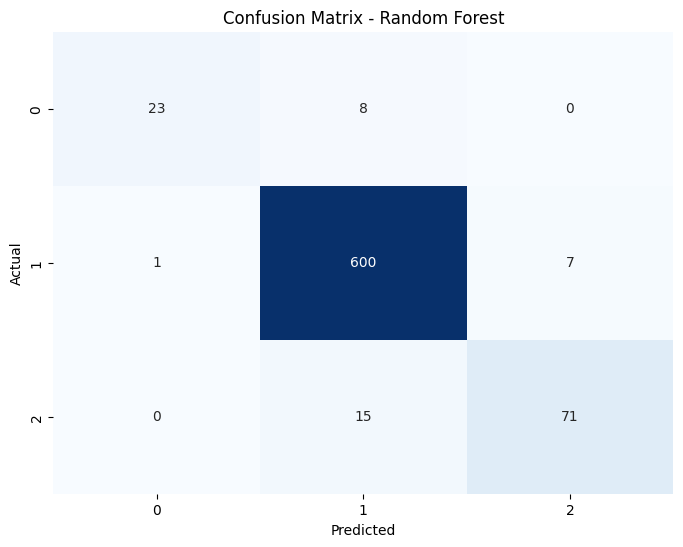


classification report : Random Forest

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.96      0.99      0.97       608
           2       0.91      0.83      0.87        86

    accuracy                           0.96       725
   macro avg       0.94      0.85      0.89       725
weighted avg       0.96      0.96      0.96       725



In [48]:
rndmfst_st = time()
rndmfst_mdl = RandomForestClassifier(criterion="gini", max_depth= 20,n_estimators=1000)
rndmfst_mdl.fit(x_traindts, y_traindts)
rndmfst_ed = time()
rndmfst_ypred = rndmfst_mdl.predict(x_testdts)

rndmfst_scr = rndmfst_mdl.score(x_testdts,y_testdts)
rndmfst_confm = confusion_matrix(y_testdts,rndmfst_ypred)
rndmfst_clsrpt = classification_report(y_testdts,rndmfst_ypred)

print("Random forest Evaluation")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("time : ",rndmfst_ed-rndmfst_st)
print(" score: ",rndmfst_scr)

plt.figure(figsize=(8, 6))
sns.heatmap(rndmfst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nclassification report : Random Forest\n")
print(rndmfst_clsrpt)



# Bagging Classifier with Decision Tree

Bagging classifier
 total time taken : 4.802631855010986
Accuracy score: 0.9572413793103448


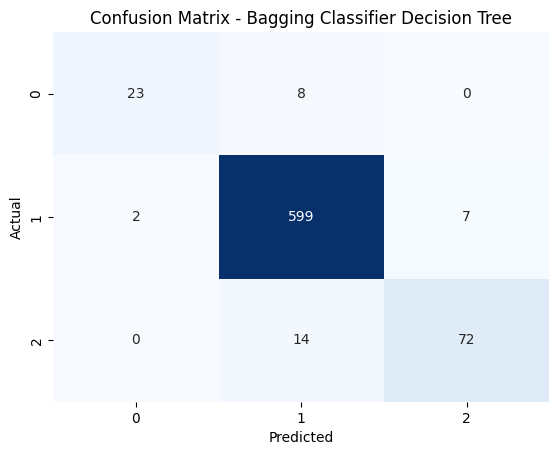

 Bagging classifier score : 0.9572413793103448
classification report : Bagging
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.96      0.99      0.97       608
           2       0.91      0.84      0.87        86

    accuracy                           0.96       725
   macro avg       0.93      0.85      0.89       725
weighted avg       0.96      0.96      0.96       725



In [49]:
from sklearn.ensemble import BaggingClassifier

baggdt_str = time()
baggdt_clsmdl = BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy', max_depth = 20,min_samples_leaf = 1), n_estimators=950, bootstrap=True)
baggdt_clsmdl.fit(x_traindts, y_traindts)

baggdt_ypred = baggdt_clsmdl.predict(x_testdts)

baggdt_scr = baggdt_clsmdl.score(x_testdts,y_testdts)

baggdt_confm = confusion_matrix(y_testdts,baggdt_ypred)
baggdt_clsrpt = classification_report(y_testdts,baggdt_ypred)
baggdt_ed = time()
print("Bagging classifier")
print("==============================")
print(" total time taken :",baggdt_ed-baggdt_str )
print("Accuracy score:",baggdt_scr)
sns.heatmap(baggdt_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bagging Classifier Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(" Bagging classifier score :",baggdt_scr)
print("classification report : Bagging")
print(baggdt_clsrpt)

# Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier


Gradient Boosting Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  4.821149826049805
 
accuracy :  0.9503448275862069


/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/geetharam/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


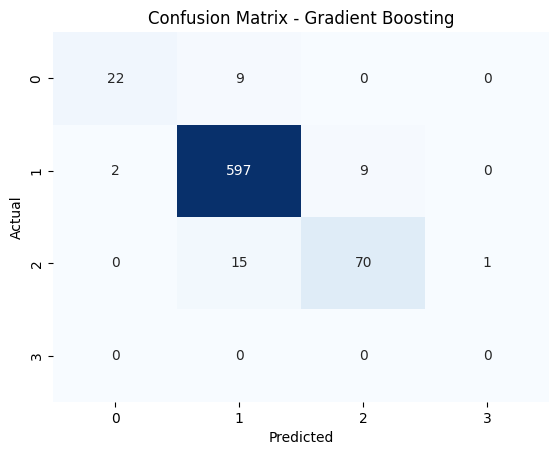

Classification Report : Gradient Boosting
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.96      0.98      0.97       608
           2       0.89      0.81      0.85        86
           3       0.00      0.00      0.00         0

    accuracy                           0.95       725
   macro avg       0.69      0.63      0.66       725
weighted avg       0.95      0.95      0.95       725



In [51]:
gradi_stm = time()
gradibst_mdl = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.5,
                                          min_samples_leaf=4,
                                          max_depth=15)
gradibst_mdl.fit(x_traindts,y_traindts)

gradibst_ypred = gradibst_mdl.predict(x_testdts)

gradibst_score = gradibst_mdl.score(x_testdts,y_testdts)

gradibst_confm = confusion_matrix(y_testdts,gradibst_ypred)


gradibst_clsrpt = classification_report(y_testdts,gradibst_ypred)
gradi_edtm = time()
print("Gradient Boosting Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",gradi_edtm-gradi_stm)
print(" \naccuracy : ",gradibst_score)

sns.heatmap(gradibst_confm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : Gradient Boosting\n",gradibst_clsrpt)

# XGB Classifier

XGB Classifier Algorithm 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Time:  0.5467531681060791
 
accuracy :  0.9475862068965517


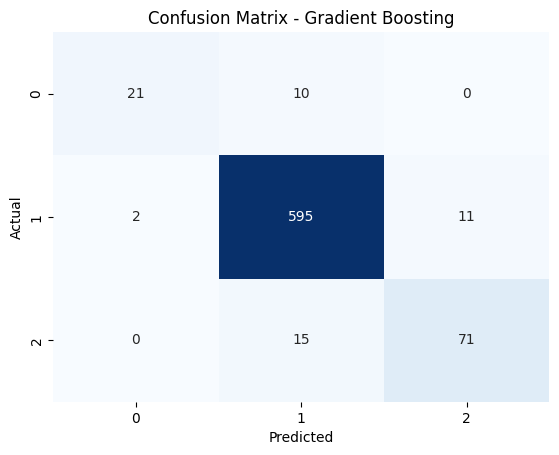

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.68      0.78        31
           1       0.96      0.98      0.97       608
           2       0.87      0.83      0.85        86

    accuracy                           0.95       725
   macro avg       0.91      0.83      0.86       725
weighted avg       0.95      0.95      0.95       725



In [101]:
from xgboost import XGBClassifier


xgbst_tm = time()
xgbclassif_mdl = XGBClassifier(n_estimators=1000,learning_rate=0.9, n_jobs=-1,max_depth = 1)
xgbclassif_mdl.fit(x_traindts, y_traindts)

xgby_pred = xgbclassif_mdl.predict(x_testdts)

xgbclassif_score = xgbclassif_mdl.score(x_testdts, y_testdts)

confm_xgb = confusion_matrix(y_testdts, xgby_pred)

clsrptxgb = classification_report(y_testdts, xgby_pred)

xgbed_tm = time()

print("XGB Classifier Algorithm ")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nTime: ",xgbed_tm-xgbst_tm)
print(" \naccuracy : ",xgbclassif_score)

sns.heatmap(confm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report : \n",clsrptxgb)